# Taxi-Data-Challenge
---


### Data Science Challenge: Trips!


This coding challenge is designed to test your skill and intuition about real world data. For the challenge, we will use data collected by the New York City Taxi and Limousine commission about “Green” Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will use the data from September 2015. We are using NYC Taxi and Limousine trip record data: (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml).


Required Questions: Please answer completely all five required questions.




__Question 1__


+ Programmatically download and load into your favorite analytical tool the trip data for September 2015.


+ Report how many rows and columns of data you have loaded.




__Question 2__


+ Plot a histogram of the number of the trip distance (“Trip Distance”).


+ Report any structure you find and any hypotheses you have about that structure.




__Question 3__


+ Report mean and median trip distance grouped by hour of day.


+ We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.




__Question 4__


+ Build a derived variable for tip as a percentage of the total fare.


+ Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.




__Question 5__

Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored.



+ Option A: Distributions


+ Build a derived variable representing the average speed over the course of a trip.


+ Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?


+ Can you build up a hypothesis of average trip speed as a function of time of day?



+ Option B: Visualization


+ Can you build a visualization (interactive or static) of the trip data that helps us understand intra- vs. inter-borough traffic? What story does it tell about how New Yorkers use their green taxis?



+ Option C: Search


+ We’re thinking about promoting ride sharing. Build a function that given point a point P, find the k trip origination points nearest P.


+ For this question, point P would be a taxi ride starting location picked by us at a given LAT-LONG.


+ As an extra layer of complexity, consider the time for pickups, so this could eventually be used for real time ride sharing matching.


+ Please explain not only how this can be computed, but how efficient your approach is (time and space complexity)



+ Option D: Anomaly Detection


+ Using time-series analysis, clustering, or some other method, please develop a process/methodology to identify out of the norm behavior and attempt to explain why those anomalies occurred.



+ Option E: Your own curiosity!


+ If the data leaps out and screams some question of you that we haven’t asked, ask it and answer it! Use this as an opportunity to highlight your special skills and philosophies




References:

https://github.com/RishiSankineni/Capital-One-Data-Challenge/blob/master/C881066_RS_Data_Challenge.ipynb


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics
from fastai.imports import * # requires fastai library installation. please pip install fastai library or comment.
# from fastai.structured import * -- not required
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import platform
print("Python version:", platform.python_version())

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('-'*50)


#Q1.1
pd.set_option('display.max_columns', None) # shows all columns when calling .head()
df = pd.read_csv('green_tripdata_2015-09.csv')
df.info()
print('-'*50)
df.head(20)

Python version: 3.7.3
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee              

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,1.07,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,1.43,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,1,1.0
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,0.90,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,1.33,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1,1.0
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,0.84,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1.0


In [60]:
df.tail()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1494921,1,2015-09-30 23:00:01,2015-09-30 23:17:21,N,1,-73.925339,40.761776,-73.786606,40.770184,1,10.6,30.5,0.5,0.5,0.00,0.0,NaN,0.3,31.80,2,1.0
1494922,1,2015-09-30 23:00:05,2015-09-30 23:08:13,N,1,-73.974312,40.685802,-73.980591,40.664055,1,1.8,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,1,-73.996437,40.681416,-73.998283,40.662296,1,1.4,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,1,-73.953606,40.587482,-73.941071,40.590843,1,0.8,5.0,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0
1494925,1,2015-09-30 23:00:11,2015-09-30 23:05:36,N,1,-73.966110,40.681351,-73.955452,40.691002,1,1.4,6.5,0.5,0.5,1.00,0.0,NaN,0.3,8.80,1,1.0


In [61]:
#Q1.2
df.shape 

(1494926, 21)

Text(0.5, 1.0, 'My Very Own Histogram')

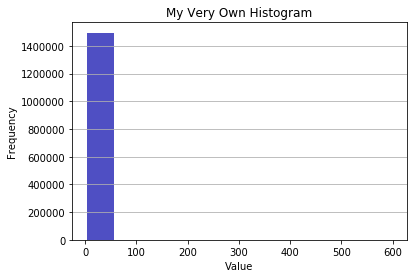

In [62]:

tripDistance_val = df['Trip_distance']


plt.hist(x=tripDistance_val, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
# Set a clean upper y-axis limit.

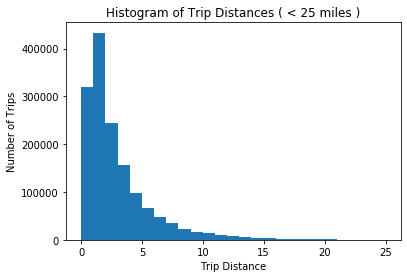

In [63]:
plt.hist(df['Trip_distance'][df['Trip_distance']<25],bins=25)
plt.title('Histogram of Trip Distances ( < 25 miles )')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.show()

Answer: 2b

The amount traveled, Trip Distance, is positively skewed. Most of the trips 
were within the 0-5 mile range. A few trips were within the 5-10 mile range, 
and a handful were > 10 miles.

In [64]:
# we're stripping the hour feature from the pickup_datetime feature to create a new feature named "pickup_hour"
df['pickup'] = df['lpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['pickup_hour'] = df['pickup'].apply(lambda x: x.hour) 

# we're stripping the hour feature from the dropoff_datetime feature to create a new feature named "dropoff_hour"
df['dropoff'] = df['Lpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['dropoff_hour'] = df['dropoff'].apply(lambda x: x.hour)# this is a new feature for holding the dropoff_hour.

df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:02:36,0,2015-09-01 00:06:42,0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:00:14,0,2015-09-01 00:04:20,0


In [65]:
df['avg_trip_dist_per_pickup_hour'] = df[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean()
df.head(30)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,avg_trip_dist_per_pickup_hour
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,3.115276
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0,3.017347
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0,3.046176
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:02:36,0,2015-09-01 00:06:42,0,3.212945
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:00:14,0,2015-09-01 00:04:20,0,3.526555
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,1.07,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0,2015-09-01 00:00:39,0,2015-09-01 00:05:20,0,4.133474
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,1.43,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,1,1.0,2015-09-01 00:00:52,0,2015-09-01 00:05:50,0,4.055149
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,0.90,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:02:15,0,2015-09-01 00:05:34,0,3.284394
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,1.33,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1,1.0,2015-09-01 00:02:36,0,2015-09-01 00:07:20,0,3.048450
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,0.84,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1.0,2015-09-01 00:02:13,0,2015-09-01 00:07:23,0,2.999105


In [66]:
x = df['pickup_hour'].unique()
df['unique_pickup_hours'] = pd.Series(list(x))
df.head(30)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,avg_trip_dist_per_pickup_hour,unique_pickup_hours
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,3.115276,0.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0,3.017347,1.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0,3.046176,2.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:02:36,0,2015-09-01 00:06:42,0,3.212945,3.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:00:14,0,2015-09-01 00:04:20,0,3.526555,4.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,1.07,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0,2015-09-01 00:00:39,0,2015-09-01 00:05:20,0,4.133474,5.0
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,1.43,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,1,1.0,2015-09-01 00:00:52,0,2015-09-01 00:05:50,0,4.055149,6.0
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,0.90,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:02:15,0,2015-09-01 00:05:34,0,3.284394,7.0
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,1.33,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1,1.0,2015-09-01 00:02:36,0,2015-09-01 00:07:20,0,3.048450,8.0
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,0.84,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1.0,2015-09-01 00:02:13,0,2015-09-01 00:07:23,0,2.999105,9.0


<BarContainer object of 24 artists>

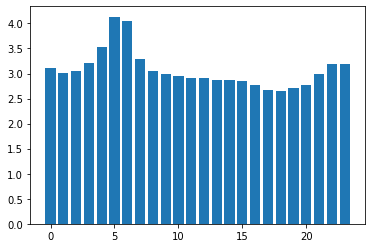

In [67]:
#plt.bar(x=df['unique_pickup_hours'], height=df['avg_trip_dist_per_pickup_hour']
avg_dist_per_hour = df.iloc[:24,-2]
hour = df.iloc[:24,-1]
plt.bar(hour, avg_dist_per_hour)

## OR

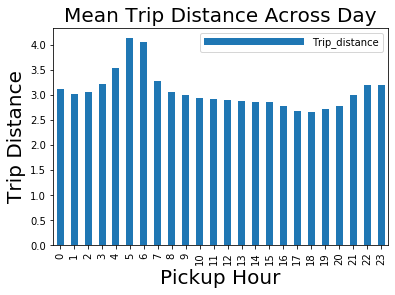

In [68]:
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
plt.title('Mean Trip Distance Across Day', fontsize = 20)
plt.xlabel('Pickup Hour', fontsize = 20)
plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

Answer 3a: Looks like the __average__ trip distance covered by the "Green" cabs is relatively higher during the early hours( 4-7 AM)

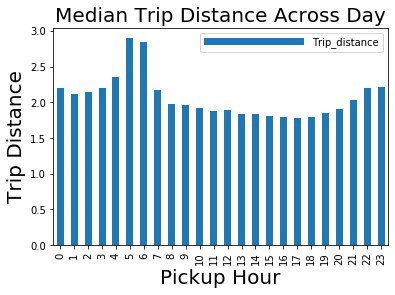

In [69]:
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
plt.title('Median Trip Distance Across Day', fontsize = 20)
plt.xlabel('Pickup Hour', fontsize = 20)
plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

Answer 3a (cont): Looks like the __median__ trip distance covered by the "Green" cabs is relatively higher during the early hours( 4-7 AM)

In [70]:
df.head(1)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,avg_trip_dist_per_pickup_hour,unique_pickup_hours
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.68502,1,0.0,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,3.115276,0.0


In [71]:
df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)
 # turns 'lpep_pickup_datetime' into datetimelike values

In [72]:
df.loc[:, 'day_of_week'] = df['lpep_pickup_datetime'].dt.dayofweek

In [73]:
df.head(3)


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,avg_trip_dist_per_pickup_hour,unique_pickup_hours,day_of_week
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,3.115276,0.0,1
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0,3.017347,1.0,1
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0,3.046176,2.0,1


In [74]:
df.tail(3)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,avg_trip_dist_per_pickup_hour,unique_pickup_hours,day_of_week
1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,1,-73.996437,40.681416,-73.998283,40.662296,1,1.4,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0,2015-09-30 23:00:30,23,2015-09-30 23:08:39,23,NaN,NaN,2
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,1,-73.953606,40.587482,-73.941071,40.590843,1,0.8,5.0,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0,2015-09-30 23:00:10,23,2015-09-30 23:03:49,23,NaN,NaN,2
1494925,1,2015-09-30 23:00:11,2015-09-30 23:05:36,N,1,-73.966110,40.681351,-73.955452,40.691002,1,1.4,6.5,0.5,0.5,1.00,0.0,NaN,0.3,8.80,1,1.0,2015-09-30 23:00:11,23,2015-09-30 23:05:36,23,NaN,NaN,2


In [75]:
# code block for mean trip distance
summary_wdays_avg_duration = pd.DataFrame(df.groupby(['day_of_week','pickup_hour'])['Trip_distance'].mean())
summary_wdays_avg_duration

Trip_distance
day_of_week pickup_hour               
0           0                 3.192842
            1                 3.034079
            2                 2.982281
            3                 3.135399
            4                 3.760184
            5                 4.392215
            6                 3.973538
            7                 3.337477
            8                 3.057778
            9                 3.034642
            10                3.059474
            11                3.009346
            12                2.991123
            13                2.965579
            14                2.894196
            15                2.907666
            16                2.791232
            17                2.745496
            18                2.635048
            19                2.664383
            20                2.801000
            21                3.063647
            22                3.120877
            23                3.104662
1           0                 3.037614
            1                 2.799109
            2                 2.768981
            3                 2.853694
            4                 3.767336
            5                 4.438443
...                                ...
5           18                2.959428
            19                2.936187
            20                2.893805
            21                3.025660
            22                3.285168
            23                3.340130
6           0                 3.216518
            1                 3.171715
            2                 3.226457
            3                 3.428350
            4                 3.461413
            5                 3.729737
            6                 4.101656
            7                 3.942593
            8                 3.736294
            9                 3.343978
            10                3.115326
            11                3.042044
            12                3.002829
            13                3.006555
            14                3.041956
            15                3.052927
            16                3.065442
            17                3.022108
            18                2.997446
            19                2.988609
            20                2.943683
            21                3.021795
            22                3.310296
            23                3.324901

[168 rows x 1 columns]

In [76]:
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration

,day_of_week,pickup_hour,Trip_distance
0,0,0,3.192842
1,0,1,3.034079
2,0,2,2.982281
3,0,3,3.135399
4,0,4,3.760184
5,0,5,4.392215
6,0,6,3.973538
7,0,7,3.337477
8,0,8,3.057778
9,0,9,3.034642


In [77]:
summary_wdays_avg_duration['unit']=1
summary_wdays_avg_duration.head()

,day_of_week,pickup_hour,Trip_distance,unit
0,0,0,3.192842,1
1,0,1,3.034079,1
2,0,2,2.982281,1
3,0,3,3.135399,1
4,0,4,3.760184,1


     day_of_week  pickup_hour  Trip_distance  unit
0              0            0       3.192842     1
1              0            1       3.034079     1
2              0            2       2.982281     1
3              0            3       3.135399     1
4              0            4       3.760184     1
5              0            5       4.392215     1
6              0            6       3.973538     1
7              0            7       3.337477     1
8              0            8       3.057778     1
9              0            9       3.034642     1
10             0           10       3.059474     1
11             0           11       3.009346     1
12             0           12       2.991123     1
13             0           13       2.965579     1
14             0           14       2.894196     1
15             0           15       2.907666     1
16             0           16       2.791232     1
17             0           17       2.745496     1
18             0           18  

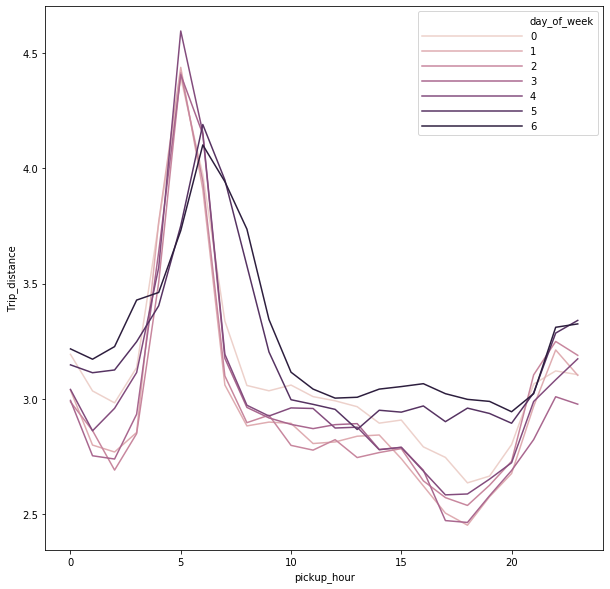

In [78]:
# import seaborn as sns; sns.set()
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plt.style.use('ggplot')
# params = {'legend.fontsize': 10,
#           'legend.handlelength': 10}
# plt.rcParams.update(params)

print(summary_wdays_avg_duration)
ax = sns.lineplot(x="pickup_hour", y="Trip_distance", legend="full" , data=summary_wdays_avg_duration, estimator=None, hue="day_of_week")

For part 3b, 

According to my Google Search for nearest NYC airports and their coordinates:

+ John F. Kennedy International
  - 40.6413° N, 73.7781° W  
+ LaGuardia Airport
  - 40.7730 N, -73.8702 W    
+ Newark Liberty International Airport
  - 40.6895° N, 74.1745° W

__Note:__ latitude is "N" and longitude is "W"


In [79]:
df.head(2)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,avg_trip_dist_per_pickup_hour,unique_pickup_hours,day_of_week
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.0,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,3.115276,0.0,1
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.0,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0,3.017347,1.0,1


Making a rough square perimeter around each Airport using Google Maps and documenting the coordinates:

+ John F. Kennedy International
    + East side
      + 40.645909, -73.754126
    + West side
      + 40.648142, -73.821060
    + North side
      + 40.663175, -73.787443
    + South side
      + 40.621193, -73.785742
    

+ LaGuardia Airport
    + East side
      + 40.776845, -73.852526
    + West side
      + 40.780497, -73.894678
    + North side
      + 40.789122, -73.874431
    + South side
      + 40.762710, -73.874614

+ Newark Liberty International Airport
    + East side
      + 40.689634, -74.128306
    + West side
      + 40.691749, -74.215532
    + North side
      + 40.714310, -74.175410
    + South side
      + 40.664761, -74.178784
    


In [80]:
# this a helper function to identify whether or not the pickup/dropoff took place at an airport.
def which_nyc_airport(row):
    if ( (((row['Pickup_latitude'] < 40.663175) & (row['Pickup_latitude'] > 40.621193)) & ((row['Pickup_longitude'] > -73.821060) & (row['Pickup_longitude'] < -73.754126))) | (((row['Dropoff_latitude'] < 40.663175) & (row['Dropoff_latitude'] > 40.621193)) & ((row['Dropoff_longitude'] > -73.821060) & (row['Dropoff_longitude'] < -73.754126))) ):
        return "JFK"
    if ( (((row['Pickup_latitude'] < 40.789122) & (row['Pickup_latitude'] > 40.762710)) & ((row['Pickup_longitude'] > -73.894678) & (row['Pickup_longitude'] < -73.852526))) | (((row['Dropoff_latitude'] < 40.789122) & (row['Dropoff_latitude'] > 40.762710)) & ((row['Dropoff_longitude'] > -73.894678) & (row['Dropoff_longitude'] < -73.852526))) ):
        return "LAG"
    if ( (((row['Pickup_latitude'] < 40.714310) & (row['Pickup_latitude'] > 40.664761)) & ((row['Pickup_longitude'] > -74.215532) & (row['Pickup_longitude'] < -74.128306))) | (((row['Dropoff_latitude'] < 40.714310) & (row['Dropoff_latitude'] > 40.664761)) & ((row['Dropoff_longitude'] > -74.215532) & (row['Dropoff_longitude'] < -74.128306))) ):
        return "NEW"
    else:
        return "NA"

In [81]:
df['Airport'] = df.apply(which_nyc_airport, axis=1) 
# this is to create a new field in the dataframe based on the helper function written above.


In [82]:
df['Airport'].value_counts() 

NA     1447374
LAG      33157
JFK      13651
NEW        744
Name: Airport, dtype: int64